<a href="https://colab.research.google.com/github/JSJeong-me/Introduction-to-Data-Analysis-with-DL-and-ML/blob/main/3-DL/23-Keras-Default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

Data Set Preparation

In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv("./Data_USD.csv")

In [ ]:
df.tail()

In [6]:
df.columns

Index(['LIMIT_BAL_US', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SCORE_AVG',
       'BILL_AVG_US', 'PAY_AMT_AVG_US', 'PAY_TO_BILL', 'CREDIT_UTILIZATION',
       'DEFAULT_PAYMENT_NEXT_MO'],
      dtype='object')

In [7]:
X = df.drop('DEFAULT_PAYMENT_NEXT_MO',axis =1).values
y = df['DEFAULT_PAYMENT_NEXT_MO'].values

In [8]:
X[-1]

array([1.81428571e+03, 1.00000000e+00, 2.00000000e+00, 1.00000000e+00,
       4.60000000e+01, 0.00000000e+00, 1.39623800e+03, 5.02436190e+01,
       4.00000000e-02, 9.58580000e-01])

In [9]:
y[-1]

1

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
len(X_test)

9000

In [12]:
sc = StandardScaler()

In [13]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
X_train[-1]

array([-0.05504288,  0.80648893,  0.18648797, -1.05381817,  0.05416417,
       -1.84759474, -0.65392199, -0.11985747,  0.10229889, -1.02579807])

In [15]:
X_test[-1]

array([ 0.64128415,  0.80648893, -1.07681763, -1.05381817,  0.05416417,
       -1.84759474, -0.65301532, -0.03974819,  0.13364524, -1.00113854])

In [16]:
len(X_train)

21000

In [17]:
input_param = X.shape[1]

In [18]:
# Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(units=512, input_shape=[input_param], activation='relu'),
    layers.Dense(units=1024, activation='relu'),
    layers.Dropout(0.2),
    # layers.BatchNormalization(),
    layers.Dense(units=512, activation='relu'),
    layers.Dropout(0.2),
    # layers.BatchNormalization(),
    layers.Dense(units=128, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(units=32, activation='relu'),
    layers.Dense(units = 1, activation = 'sigmoid')
])

In [19]:
# model.add(layers.Dense(units = 1, activation = 'sigmoid'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               5632      
                                                                 
 dense_1 (Dense)             (None, 1024)              525312    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               65664     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0

In [21]:
#compile the model
model.compile(optimizer = 'adam' ,
             loss = 'binary_crossentropy',
             metrics =['accuracy'])

In [22]:
model.fit(X_train, y_train, epochs=100,shuffle = True, verbose =2)

Epoch 1/100
657/657 - 8s - loss: 0.4865 - accuracy: 0.7921 - 8s/epoch - 12ms/step
Epoch 2/100
657/657 - 3s - loss: 0.4637 - accuracy: 0.8011 - 3s/epoch - 4ms/step
Epoch 3/100
657/657 - 3s - loss: 0.4593 - accuracy: 0.8035 - 3s/epoch - 4ms/step
Epoch 4/100
657/657 - 3s - loss: 0.4565 - accuracy: 0.8029 - 3s/epoch - 4ms/step
Epoch 5/100
657/657 - 3s - loss: 0.4560 - accuracy: 0.8029 - 3s/epoch - 4ms/step
Epoch 6/100
657/657 - 3s - loss: 0.4541 - accuracy: 0.8038 - 3s/epoch - 4ms/step
Epoch 7/100
657/657 - 3s - loss: 0.4522 - accuracy: 0.8028 - 3s/epoch - 4ms/step
Epoch 8/100
657/657 - 3s - loss: 0.4510 - accuracy: 0.8049 - 3s/epoch - 4ms/step
Epoch 9/100
657/657 - 3s - loss: 0.4490 - accuracy: 0.8040 - 3s/epoch - 4ms/step
Epoch 10/100
657/657 - 3s - loss: 0.4498 - accuracy: 0.8025 - 3s/epoch - 4ms/step
Epoch 11/100
657/657 - 3s - loss: 0.4494 - accuracy: 0.8038 - 3s/epoch - 4ms/step
Epoch 12/100
657/657 - 3s - loss: 0.4482 - accuracy: 0.8032 - 3s/epoch - 4ms/step
Epoch 13/100
657/657 - 3

In [23]:
#quantify the model
model_loss, model_accuracy = model.evaluate(X_test,y_test,verbose =2)
print( model_loss )
print (model_accuracy)

282/282 - 1s - loss: 0.5654 - accuracy: 0.7891 - 679ms/epoch - 2ms/step
0.5654388666152954
0.7891111373901367


In [24]:
from sklearn.metrics import recall_score

In [25]:
y_prediction = model.predict(X_test)

282/282 [==============================] - 1s 2ms/step


In [26]:
y_prediction[:3]

array([[0.1404495 ],
       [0.02620711],
       [0.11741614]], dtype=float32)

In [27]:
predictions = np.rint(y_prediction)

In [28]:
print("Recall score:"+ str(recall_score(y_test, predictions)))

Recall score:0.37448979591836734


In [29]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [30]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

Confusion matrix, without normalization
[[6368  672]
 [1226  734]]


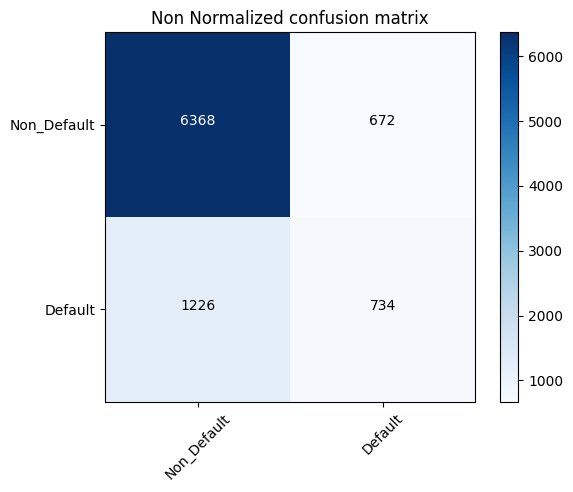

In [31]:
cnf_matrix = confusion_matrix(y_test, predictions)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non_Default','Default'], normalize=False,
                      title='Non Normalized confusion matrix')